### COLOR SPACES

https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/


#### RGB
device dependent

condition dependent

#### HSV
device dependent

h,s not so much condition dependent

cyclic (red look realy different indor/outdoor)

#### LAB
LUMINANCE+2COLORS

inspired by human vision

device INDEPENDENT

mostly L condition dependent

### color thresholding rgb
separating the channels it's a usefull way to understand which color threshold based on the current space

masking the 3 joint channels it's the same than masking them separately and merging

color thresholding in hsv space should be done using np.uint8 and conversion

simple threshold has the same effect as masking with lower value 0 and same upper val for each channel



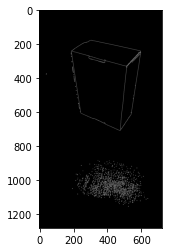

In [4]:
# channels extraction, mask and threshold
import cv2
import numpy as np
from matplotlib import pyplot as plt
debhist=0
debhsv=0
debresult=0
debcanny=1
image=cv2.cvtColor(cv2.imread('../zimages/box/box3.jpg'),cv2.COLOR_BGR2RGB)

#channel split
imager,imageg,imageb = cv2.split(image)

#channel histograms
histr,_ = np.histogram(imager,256,[0,256])#may use imager.flatten()
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
if debhist:
    plt.plot(histr,color = 'r')
    plt.plot(histg,color = 'g')
    plt.plot(histb,color = 'b')
    plt.show()
    
#channel merging
#imagem=cv2.merge((rimage,gimage,bimage))

##green = np.uint8([[[0,255,0 ]]])
##hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)

#mask on the original image without channel separation
wholelow=(0,0,0)
wholehigh=(135,115,115)
wholemask= cv2.bitwise_not(cv2.inRange(image,wholelow,wholehigh))#killmaskt
wholeimage=cv2.bitwise_and(image,image,mask=wholemask)
if debresult:
    plt.imshow(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY),cmap='gray')
    plt.show()
    
## if the lower value is zero, a simple thresholding can be applied
##_, threshr = cv2.threshold(imager, 135, 255, cv2.THRESH_BINARY),...
##rgb_thresh = cv2.merge((threshr,...))
##if values of threshold are the same, it's equal to
##_,rgb_thresh = cv2.threshold(image_rgb, thrval, 255, cv2.THRESH_BINARY)

#edges/contours on the masked image
filterparam=(100,20,0)
imagedges=cv2.Canny(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY),filterparam[0], filterparam[1], filterparam[2])
if debcanny:
    plt.imshow(imagedges,cmap='gray')
    plt.show()


### color thresholding hsv
hue thresholding is not enough with a wild image to separate the color (due to color mixing on the pixels/light conditions), saturation/value channel should be used also (as in the example below), in this case similarly to the color mask in hsv space.

filterng (gaussian, median) had no improvement on the single h channel edge detection

https://stackoverflow.com/questions/29156091/opencv-edge-border-detection-based-on-color

hue channel it's circular, with values [0,179(°)], hence min and max vlues coincide; when those must be considered | our value<0 or >360°, it's better to shift the whole channel by an angular quantity | channel_shift=angular_shift/2 

heuristics must be introduced to separate joint contours: thresholding the other channels since borderline pixels may assume a mixed color (hence inside hue range), or dilation to create an inner and outer contour and pick the inner ones(hierarcky>0)

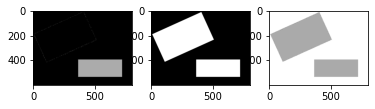

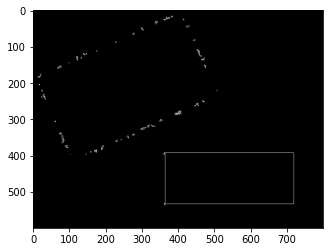

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=1
doshift=0

image=cv2.cvtColor(cv2.imread('../zimages/rectangles.jpg'),cv2.COLOR_BGR2HSV)
imgh,imgs,imgv=cv2.split(image)
if debug:
    plt.subplot(1,3,1)
    plt.imshow(imgh,cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(imgs,cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(imgv,cmap='gray')
    plt.show()

if doshift:
    angular_shift=50
    hueshift=angular_shift/2
    imgh=(imgh+ hueshift) % 180
    plt.imshow(imgh,cmap='gray')
    plt.show()

#threshold on s/v channel to separate joint contours,otherwise:
#dilation and picking of inner contours through hierarchy(this one after canny)

#edge detector
imghedg= cv2.Canny(imgh, 10,500,1)
if debug:
    plt.imshow(imghedg,cmap='gray')
    plt.show()
if 0:
    limlow=(50,50,50)
    limhigh=(255,255,)
    mask = cv2.inRange(hsvimage, limlow,limhigh)
    thresimage = cv2.bitwise_and(image,image, mask=mask)
  

### logical thresholding
accessing directly to the channels of the converted image, without the  use of thresholding or masking function

for implementing thresholding in range, 2 consecutive masks are required; execution time appears a little longer

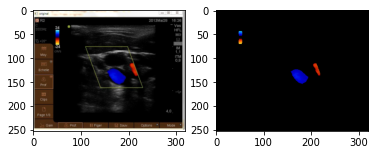

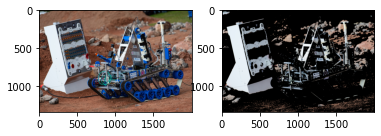

In [3]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../zimages/echocolor.jpg')
image_thr = img.copy()

imh = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
image_thr[(imh[...,1]<180) | (imh[...,2]<150)]=0

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image_thr)
plt.show()

img = cv2.cvtColor(cv2.imread('../zimages/marsyard/task-example.jpg'),cv2.COLOR_BGR2RGB)
image_thr = img.copy()
image_thr[(img[...,0]<100) | (img[...,2]<100) |(img[...,1]<100)]=0
## 
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image_thr)
plt.show()

### test on a  marsyard image

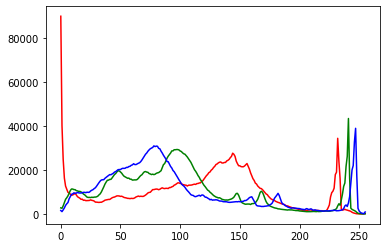

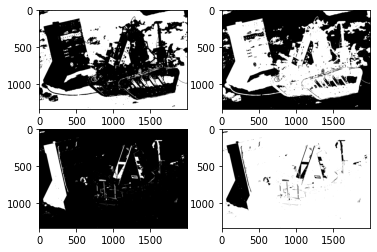

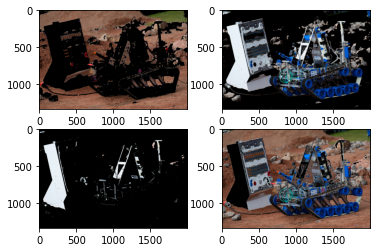

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
debhist=1

image = cv2.cvtColor(cv2.imread("../zimages/marsyard/task-example.jpg"), cv2.COLOR_BGR2RGB)
imager,imageg,imageb = cv2.split(image)

histr,_ = np.histogram(imager,256,[0,256])#may use imager.flatten()
histg,_ = np.histogram(imageg,256,[0,256])
histb,_ = np.histogram(imageb,256,[0,256])
if debhist:
    plt.plot(histr,color = 'r')
    plt.plot(histg,color = 'g')
    plt.plot(histb,color = 'b')
    plt.show()
    
#color thresholding
minred=(50,50,50)
maxred=(255,255,255)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

imagehsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

masknored = cv2.bitwise_not(cv2.inRange(imagehsv, minred,maxred))
maskred = (cv2.inRange(imagehsv, minred,maxred))
imagenored = cv2.bitwise_and(image,image, mask=masknored)
imagered= cv2.bitwise_and(image,image, mask=maskred)
maskwhite = cv2.inRange(imagehsv, light_white, dark_white)
imagewhite = cv2.bitwise_and(image, image, mask=maskwhite)
masknowhite =  cv2.bitwise_not(cv2.inRange(imagehsv, light_white, dark_white))
imagenowhite =cv2.bitwise_and(image, image, mask=masknowhite)

#maskfin= maskred + maskwhite
#imagefin = cv2.bitwise_and(image,image, mask=maskfin)
plt.subplot(2, 2, 1)
plt.imshow(maskred, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(masknored, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(maskwhite, cmap="gray")
plt.subplot(2, 2, 4)
plt.imshow(masknowhite, cmap="gray")
plt.show()

plt.subplot(2, 2, 1)
plt.imshow(imagered)
plt.subplot(2, 2, 2)
plt.imshow(imagenored)
plt.subplot(2, 2, 3)
plt.imshow(imagewhite)
plt.subplot(2, 2, 4)
plt.imshow(imagenowhite)
plt.show()


### adaptive color mask


finds the most common pixel distribution

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image=cv2.imread('../zimages/marsyard/task-example.jpg')

roi_dim=(50,50)



### meanshift, camshift

https://docs.opencv.org/master/d7/d00/tutorial_meanshift.html

cv.calcHist(images, channels, mask, histSize, ranges[, hist[, (uniform),accumulate]])

    images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
    channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
    mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
    histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
    ranges : this is our RANGE. Normally, it is [0,256].
    uniform: if true, bins have same size
    accumulate: if false, clears the histogram at the beginning
    
normalize the histogram so its values fall in the range indicated by the parameters entered

**improv:** mask usage before tracking (color selection)

In [12]:
#meanshift

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

videosrc='../zimages/video/3bodybed.mp4'
cap = cv.VideoCapture(videosrc)
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
x, y, w, h = cv.selectROI(frame)
cv.destroyAllWindows()
track_window = (x, y, w, h)
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
while(1):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cv.destroyAllWindows()      


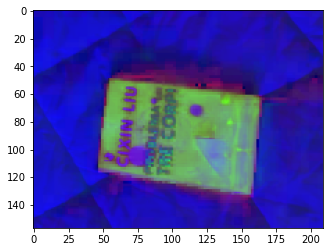

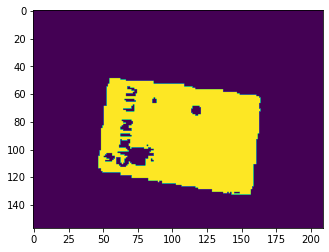

In [4]:
#camshift
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

videosrc='../zimages/video/3bodybed.mp4'
cap = cv.VideoCapture(videosrc)
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
x, y, w, h = cv.selectROI(frame)
cv.destroyAllWindows()
track_window = (x, y, w, h)
# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
plt.imshow(hsv_roi)
plt.show()
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
plt.imshow(mask)
plt.show()
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
while(1):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply camshift to get the new location
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        # Draw it on image
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame,[pts],True, 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cv.destroyAllWindows()

### back projection of histogram
assigns a probability for each pixel of the image to belong to a specific area of interest

https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/back_projection/back_projection.html

https://docs.opencv.org/master/dc/df6/tutorial_py_histogram_backprojection.html#gsc.tab=0

**improv:** understand most useful structuring element
            acquire more roi and use a mean value
            sum more mask
            
histograms can be compared to samples from pictures of marsyard or color ranges


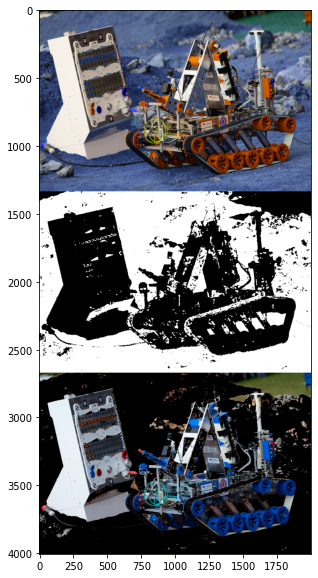

In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
manualselect=0
target =cv.imread('../../images/marsyard/task-example.jpg')
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
#manually selection of roi
if manualselect:
    roi = cv.selectROI(target)
    cv.destroyAllWindows()
    #extraction of roi from image
    roi=target[roi[1]:roi[1]+roi[3],roi[0]:roi[0]+roi[2]]
else:
    roi=cv.imread('../../images/marsyard/abundant.jpg')
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
#roi histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalization sets the value inside the wanted range
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
#backprojection
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
sizeEl=7
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(sizeEl,sizeEl))
cv.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(cv.cvtColor(target,cv.COLOR_BGR2RGB),cv.bitwise_not(thresh))
res = np.vstack((target,thresh,res))
plt.figure(figsize=(20,10))
plt.imshow(res,cmap='gray')
plt.show()

can acquire more roi using a vector as argument or use selectROIs

### histogram comparison
https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html

https://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/

https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/


hist compare methods:

cv.HISTCMP_CORREL==0 : correlation

cv.HISTCMP_CHISQR==1 : chi squared

cv.HISTCMP_CHISQR_ALT==4 : alternativeformula 

cv.HISTCMP_INTERSECT==2 : intersection

cv.HISTCMP_BHATTACHARYYA==3 : Bhattacharyya distance

cv.HISTCMP_HELLINGER==3 : hellinger d., same as above

cv.HISTCMP_KL_DIV==5 : Kullback-Leibler divergence


first one is the simplest

#######Method: Correlation ########
histogram comparison 0.5502005173125567
#######Method: Chi-Squared ########
histogram comparison 712.3720145973386
#######Method: Intersection ########
histogram comparison 29.726718176618306
#######Method: Hellinger ########
histogram comparison 0.5579157299229364
#######Method: Kullback-Leibler ########
histogram comparison 85.13110978200238


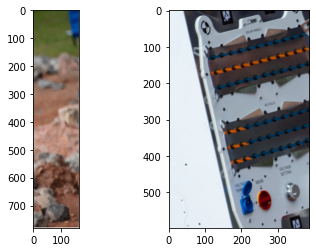

In [62]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

COMP_METHODS = (
    ("Correlation", cv.HISTCMP_CORREL),
    ("Chi-Squared", cv.HISTCMP_CHISQR),
    ("Intersection", cv.HISTCMP_INTERSECT),
    ("Hellinger", cv.HISTCMP_BHATTACHARYYA),
    ("Kullback-Leibler",cv.HISTCMP_KL_DIV))

singleroi=1
manualselect=0

h_bins = 180#50
s_bins = 256#60
histSize = [h_bins, s_bins]
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists
channels = [0, 1]

image =cv.imread('../../images/marsyard/task-example.jpg')
hsvim=cv.cvtColor(image, cv.COLOR_BGR2HSV)
hsvdown = hsvim[hsvim.shape[0]//2:,:]
hsvup = hsvim[0:hsvim.shape[0]//2,:]
histim = cv.calcHist([hsvim], channels, None, histSize, ranges, accumulate=False)
cv.normalize(histim, histim, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
histdown = cv.calcHist([hsvdown], channels, None, histSize, ranges, accumulate=False)
cv.normalize(histdown, histdown, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
histup = cv.calcHist([hsvup], channels, None, histSize, ranges, accumulate=False)
cv.normalize(histup, histup, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
if manualselect:
    if singleroi:
        roi1=cv.selectROI(image)
    else:
        rois=cv.selectROIs('',image)
        roi1=rois[0]#...
    cv.destroyAllWindows()
    roi1=image[roi1[1]:roi1[1]+roi1[3],roi1[0]:roi1[0]+roi1[2]]#...
    hsvroi1 = cv.cvtColor(roi1, cv.COLOR_BGR2HSV)
    histroi1 = cv.calcHist([hsvroi1], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(histroi1,histroi1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
else:
    imgrass=cv.cvtColor(cv.imread('../../images/marsyard/grass.jpg'), cv.COLOR_BGR2HSV)
    histgrass = cv.calcHist([imgrass], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(histgrass,histgrass, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    imgpanel=cv.cvtColor(cv.imread('../../images/marsyard/panel.jpg'), cv.COLOR_BGR2HSV)
    histpanel = cv.calcHist([imgpanel], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(histpanel,histpanel, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    imgback=cv.cvtColor(cv.imread('../../images/marsyard/background.jpg'), cv.COLOR_BGR2HSV)
    histback=cv.calcHist([imgback],channels,None, histSize, ranges, accumulate=False)
    cv.normalize(histback,histback, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    imgterrain=cv.cvtColor(cv.imread('../../images/marsyard/terrain.jpg'), cv.COLOR_BGR2HSV)
    histerrain = cv.calcHist([imgterrain], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(histerrain,histerrain, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    imgcom=cv.cvtColor(cv.imread('../../images/marsyard/common.jpg'), cv.COLOR_BGR2HSV)
    histcom=cv.calcHist([imgcom],channels,None, histSize, ranges, accumulate=False)
    cv.normalize(histcom,histcom, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    imgabun=cv.cvtColor(cv.imread('../../images/marsyard/abundant.jpg'), cv.COLOR_BGR2HSV)
    histabun=cv.calcHist([imgabun],channels,None, histSize, ranges, accumulate=False)
    cv.normalize(histabun,histabun, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    imgdark=cv.cvtColor(cv.imread('../../images/marsyard/dark.jpg'), cv.COLOR_BGR2HSV)
    histdark = cv.calcHist([imgdark], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(histdark,histdark, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    imglight=cv.cvtColor(cv.imread('../../images/marsyard/light.jpg'), cv.COLOR_BGR2HSV)
    histlight = cv.calcHist([imglight], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(histlight,histlight, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    imgrock=cv.cvtColor(cv.imread('../../images/marsyard/rock.jpg'), cv.COLOR_BGR2HSV)
    histrock = cv.calcHist([imgrock], channels, None, histSize, ranges, accumulate=False)
    cv.normalize(histrock,histrock, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
    
if manualselect:
    for (methodName, compare_method) in COMP_METHODS:
        totroi= cv.compareHist(histim, histroi1, compare_method)
        totdown = cv.compareHist(histim, histdown, compare_method)
        downroi = cv.compareHist(histdown, histroi1, compare_method)
        print('Method:', methodName, 'totroi, totdown, downroi :',\
              totroi, '/', totdown, '/', downroi, )
else:
    imgselected=imgback
    selected=histback
    imgtarget=hsvim
    target=histim
    for (methodName, compare_method) in COMP_METHODS:
        comparison=cv.compareHist(selected, target, compare_method)
        
        print('#######Method:', methodName,'########')
        print('histogram comparison',comparison)
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(imgselected, cv.COLOR_HSV2RGB))
    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(imgpanel,cv.COLOR_HSV2RGB))
    plt.show()


In [61]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

h_bins = 180#50
s_bins = 256#60
histSize = [h_bins, s_bins]
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists
channels = [0, 1]

image=cv.imread('../../images/marsyard/task-example.jpg')
imagehsv=cv.cvtColor(image,cv.COLOR_BGR2HSV)
imagehist = cv.calcHist([imagehsv], channels, None, histSize, ranges, accumulate=False)
cv.normalize(imagehist, imagehist, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

#roi selection:
#   hardcoded height,width   ,or
#   h%, w% of imgh, imgw     ,or
#   adaptation to interestin
numw=20
numh=20

#roi histogram testing:
#   cycling inside the image:
#        using hardcoded division values   ,or
#        using blobs, contours
compare_method=0
compare_thresh=0.45
roistack=[]
count=0
for jj in range(numh):
    for ii in range(numw):
        roi=image[jj*image.shape[0]//numh:(jj+1)*image.shape[0]//numh,\
                   ii*image.shape[1]//numw:(ii+1)*image.shape[1]//numw]
        roihsv=cv.cvtColor(roi,cv.COLOR_BGR2HSV)
        roihist = cv.calcHist([roihsv], channels, None, histSize, ranges, accumulate=False)
        cv.normalize(roihist, roihist, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
        if cv.compareHist(imagehist, roihist, compare_method)>compare_thresh:
        #could possibly add minimun diversity from previous element to differentiate, but will harm mean value
            count+=1
            print(count,'-th stacking: element',jj*numw+ii+1 )
            #plt.imshow(cv.cvtColor(roihsv,cv.COLOR_HSV2RGB))
            #plt.show()
            #np.stack(roihsv) or roistack.append(roihsv)
#adaptive mask:
#    calcHist(stackedhsv),normalize()
#    mask=backprojection
#    structuring element iteration
#->  foregroing image

#foreground filtering, mini blobs remotion,

#foreground tracking for improving further background remotion
#    calcHIst(foreground)
#    mask=backProject(foregroud_new)+backproject(background_old)
#->  foreground_new_new, background_new (to iterate possibly)
#    camshift(foreground)
#->  iterated foreground image to detect rectangular surfaces

1 -th stacking: element 4
2 -th stacking: element 5
3 -th stacking: element 25
4 -th stacking: element 35
5 -th stacking: element 61
6 -th stacking: element 89
7 -th stacking: element 118
8 -th stacking: element 119
9 -th stacking: element 135
10 -th stacking: element 138
11 -th stacking: element 156
12 -th stacking: element 169
13 -th stacking: element 212
14 -th stacking: element 222
15 -th stacking: element 243
16 -th stacking: element 260
17 -th stacking: element 263
18 -th stacking: element 280
19 -th stacking: element 283
20 -th stacking: element 298
21 -th stacking: element 302
22 -th stacking: element 319
23 -th stacking: element 320
24 -th stacking: element 339
25 -th stacking: element 340
26 -th stacking: element 345
27 -th stacking: element 346
28 -th stacking: element 348
29 -th stacking: element 349
30 -th stacking: element 357
31 -th stacking: element 358
32 -th stacking: element 359
33 -th stacking: element 360
34 -th stacking: element 361
35 -th stacking: element 362
36